In [4]:
import pandas as pd
import time

from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

from anchor_processing import *
from triplet_encoding import *
from shared_module import *

In [5]:
N_ANCHORS = ANCHORS_12

train_labels_file_path = get_path(INPUT_DIR + '/' + 'labels', N_ANCHORS, VGG19_4096)

In [6]:
df_labels = pd.read_csv(train_labels_file_path('encoding'))

df_anchor_result = process_anchors(df_labels, 'id', 'breed', N_ANCHORS)
df_anchor_result.to_csv(train_labels_file_path('anchor'), index=False)

basset anchors 


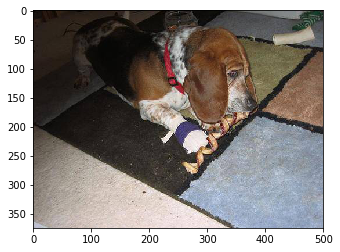

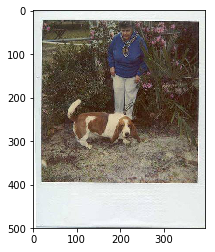

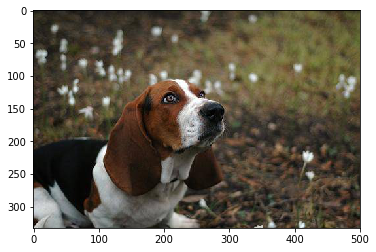

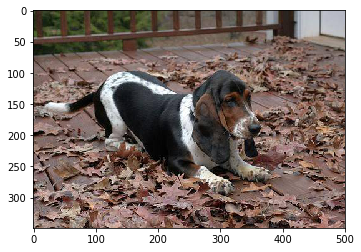

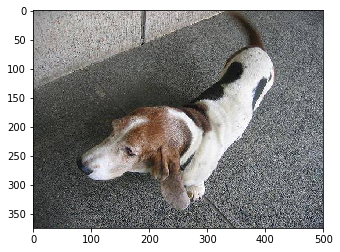

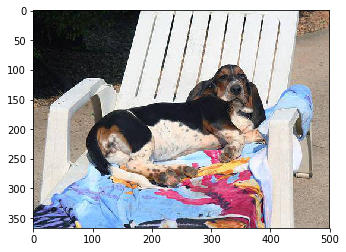

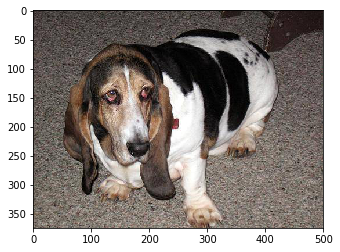

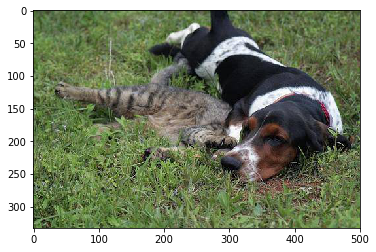

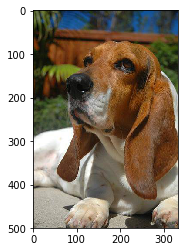

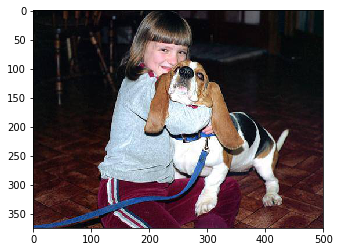

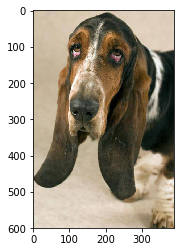

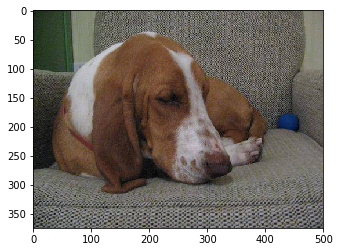

collie anchors 


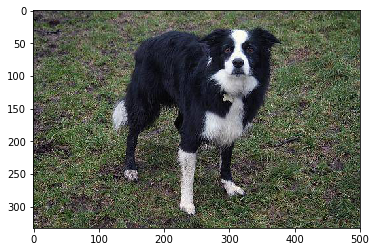

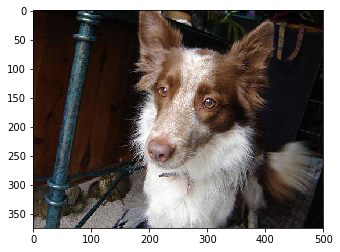

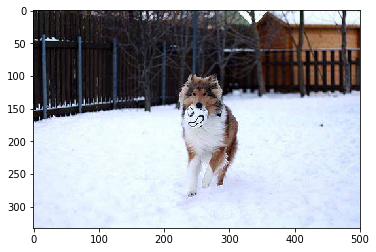

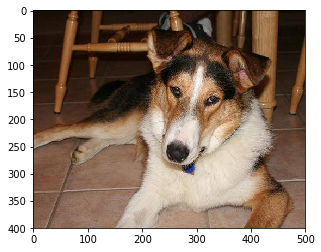

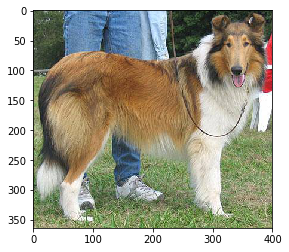

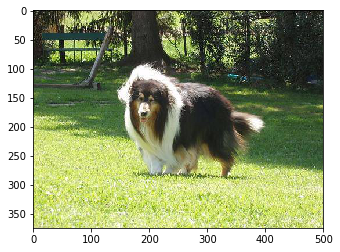

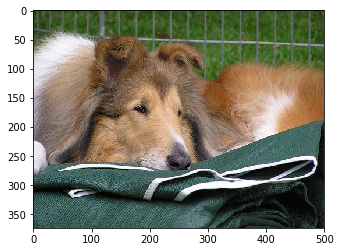

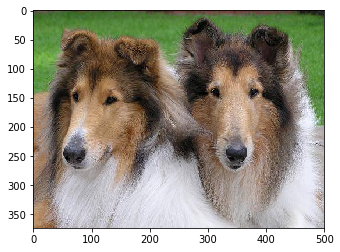

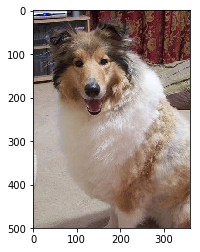

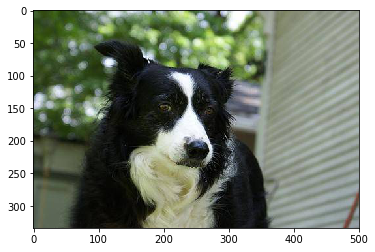

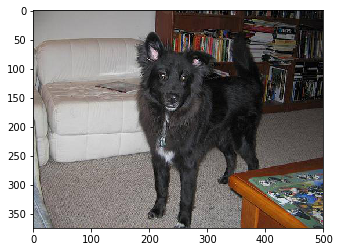

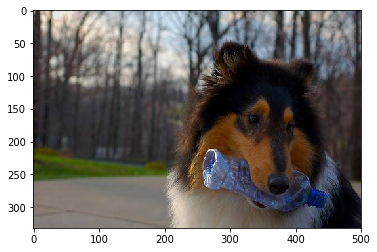

In [7]:
def show_anchors(df_anchor_result, breed):
    print(breed + ' anchors ')
    anchors = df_anchor_result[(df_anchor_result[ANP_COL] == 'A') & (df_anchor_result['breed'] == breed)]

    for i, row in anchors.iterrows():
        img = Image.open(IMAGE_DIR + '/{name}.jpg'.format(name=row['id']))
        plt.imshow(img)
        time.sleep(0.1)
        plt.show() 

show_anchors(df_anchor_result, 'basset')

show_anchors(df_anchor_result, 'collie')

In [ ]:
df_anchor_result = pd.read_csv(train_labels_file_path('anchor'))

df_anchor, df_triplet = generate_random_triplet_dataframe(df_anchor_result, 'id', 'breed', N_ANCHORS)

df_triplet.to_csv(train_labels_file_path('triplets'), index=False)
